# Warp: Distorting the image file

    Sometimes we need to distort the image file to get some diffrent result or to make dataset large enough to train. For example in captchas we neet to distort the text of captcha in many ways. Warp object carryies some functionalities to distorting an image in sine wave function

In [1]:
import cv2
import numpy as np
import math
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Warp(object):
    """
    Warp destort the image in a sine wave function.
    """
    
    def __init__(self, image, is_str=False):
        """
        param image: string/array
            if string: image file name with path
            if array: numpy array of image
        param is_str: bool, default=False
            if you are providing image file path
            then make it True and if you are proving
            image in array then make it false.
        """
        if is_str:
            self.image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        else:
            self.image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        self.rows, self.columns = self.image.shape

    def vertical_wave(self):
        """
        For vertical waves
        """

        img_output = np.zeros(self.image.shape, dtype=self.image.dtype)

        for i in range(self.rows):
            for j in range(self.columns):
                x1, x2 = 25.0, 2 # playing with these values gives you diffrent kind of waves
                offset_x = int(x1 * math.sin(x2 * 3.14 * i / 180)) 
                offset_y = 0
                if j+offset_x < self.rows:
                    img_output[i,j] = self.image[i,(j+offset_x)%self.columns]
                else:
                    img_output[i,j] = 0

        return img_output

    def horizontal_wave(self):
        """
        For horizontal wave
        """

        img_output = np.zeros(self.image.shape, dtype=self.image.dtype)

        for i in range(self.rows):
            for j in range(self.columns):
                x1, x2 = 16.0, 2 # playing with these values gives you diffrent kind of waves
                offset_x = 0
                offset_y = int(x1 * math.sin(x2 * 3.14 * j / 150))
                if i+offset_y < self.rows:
                    img_output[i,j] = self.image[(i+offset_y)%self.rows,j]
                else:
                    img_output[i,j] = 0

        return img_output

    
    def horizontal_vertical(self):
        """
        For horizontal & vertical wave
        """

        img_output = np.zeros(self.image.shape, dtype=self.image.dtype)

        for i in range(self.rows):
            for j in range(self.columns):
                x1, x2 = 20.0, 2 # playing with these values gives you diffrent kind of waves.
                                 # You can even set diffrent x1, x2 for offset_y for different
                                 # types of waves
                offset_x = int(x1 * math.sin(x2 * 3.14 * i / 150))
                offset_y = int(x1 * math.cos(x2 * 3.14 * j / 150))
                if i+offset_y < self.rows and j+offset_x < self.columns:
                    img_output[i,j] = self.image[(i+offset_y)%self.rows,(j+offset_x)%self.columns]
                else:
                    img_output[i,j] = 0

        return img_output

    def concave(self):
        """
        For concave effect
        """
        
        img_output = np.zeros(self.image.shape, dtype=self.image.dtype)

        for i in range(self.rows):
            for j in range(self.columns):
                x1, x2 = 128.0, 3 # playing with these values gives you diffrent kind of waves
                offset_x = int(x1 * math.sin(x2 * 3.14 * i / (2*self.columns)))
                offset_y = 0
                if j+offset_x < self.columns:
                    img_output[i,j] = self.image[i,(j+offset_x)%self.columns]
                else:
                    img_output[i,j] = 0

        return img_output


#### Path where your image file is stored 

In [3]:
path = '../DATA/New folder/'

#### Get all the files in list and select which one you want to distort 

In [4]:
pics = os.listdir(path)
pics

['girl-4969690_640.jpg',
 'guitar-944262_1280.jpg',
 'photographer-407068_1280.jpg',
 'woman-2593366_1280.jpg',
 'woman-3083390_1280.jpg']

####  Original Image

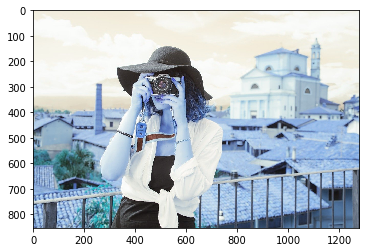

In [5]:
image = cv2.imread(path+pics[2], cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

#### Init Warp object

In [6]:
wp = Warp(path+pics[2], is_str=True) 

#### Vertical waves 

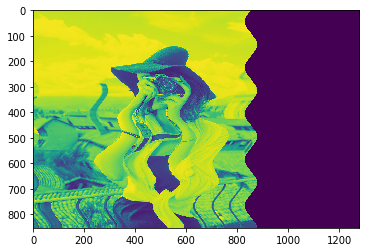

In [7]:
img_vertical = wp.vertical_wave()
plt.imshow(img_vertical)
plt.show()

#### Horizontal waves 

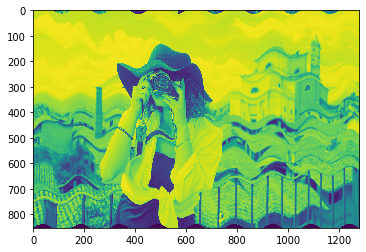

In [8]:
img_horizontal = wp.horizontal_wave()
plt.imshow(img_horizontal)
plt.show()

#### Horizontal & Vertical waves 

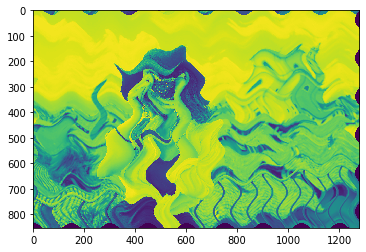

In [9]:
img_horizontal_vertical = wp.horizontal_vertical()
plt.imshow(img_horizontal_vertical)
plt.show()

#### Concave  

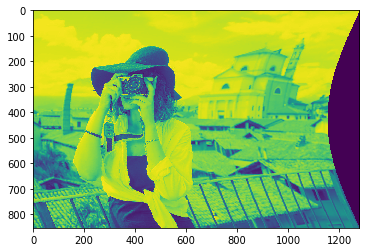

In [10]:
img_concave = wp.concave()
plt.imshow(img_concave)
plt.show()